<a href="https://colab.research.google.com/github/tjahjoe/PCVK-Genap-25-26/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import math
import cv2 as cv # Diperlukan untuk menghasilkan kernel Gaussian (Soal 3)

# SETUP PATH CITRA
PATH_CITRA = '/content/Lenna.png'

# soal 1

def konvolusi_manual(image_array, kernel):
    """
    Fungsi konvolusi 2D manual dengan Zero Padding.
    """
    image = image_array.astype(float)
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    output = np.zeros_like(image, dtype=float)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Iterasi konvolusi
    for i in range(img_h):
        for j in range(img_w):
            window = padded_image[i:i + kernel_h, j:j + kernel_w]
            nilai_piksel_baru = np.sum(window * kernel)
            output[i, j] = nilai_piksel_baru

    # Normalisasi dan pembatasan nilai [0, 255]
    output = np.clip(output, 0, 255)

    return output.astype(np.uint8)

# FUNGSI GENERATE GAUSSIAN KERNEL (Untuk Soal 3)
def generate_gaussian_kernel(kernel_size):
    """Menghasilkan kernel Gaussian 2D menggunakan metode yang disarankan modul."""
    sigma = math.sqrt(kernel_size)
    # cv.getGaussianKernel digunakan untuk menghasilkan kernel 1D
    gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
    gauss_kernel_2d = gaussian_kernel @ gaussian_kernel.transpose()
    # Normalisasi agar jumlah semua bobot adalah 1 (penting untuk LPF)
    return gauss_kernel_2d / np.sum(gauss_kernel_2d)

print("Setup awal dan fungsi konvolusi manual telah didefinisikan.")

Setup awal dan fungsi konvolusi manual telah didefinisikan.


In [ ]:
# soal 2d
try:
    img_pil = Image.open(PATH_CITRA)
    # Ubah ke Grayscale (Keabuan)
    img_grayscale = img_pil.convert('L')
    img_array = np.array(img_grayscale)
    print(f"Citra '{PATH_CITRA}' berhasil dimuat dan dikonversi ke Grayscale.")
except Exception as e:
    print(f"Error saat memuat citra: {e}")
    exit()

# soal 2e dan 3

# A. Filter Penghalus (Low Pass Filter / LPF)
AVERAGE_KERNEL = (1/9) * np.ones((3, 3))
LPF_KERNEL = (1/12) * np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
])
GAUSSIAN_5X5_KERNEL = generate_gaussian_kernel(5)
# GAUSSIAN_21X21_KERNEL = generate_gaussian_kernel(21) # Tidak dieksekusi untuk efisiensi

# B. Filter Penajam (Sharpening / HPF) & Edge Detection
# 1. Sharpen Kernel (Soal 2e)
SHARPEN_KERNEL = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# 2. Canny Edge Detection Kernel (HPF Laplacian 8-tetangga)
HPF_LAPLACIAN_KERNEL = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# 3. Emboss Filter
EMBOSS_KERNEL = np.array([
    [-2, -1, 0],
    [-1,  1, 1],
    [ 0,  1, 2]
])

# 4. Left Sobel Edge Detection (Vertikal)
LEFT_SOBEL_KERNEL = np.array([
    [ 1, 0, -1],
    [ 2, 0, -2],
    [ 1, 0, -1]
])

# 5. Prewitt Edge Detection (Horizontal)
PREWITT_KERNEL_H = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

print("Semua citra dan kernel telah siap untuk diolah.")

Citra '/content/Lenna.png' berhasil dimuat dan dikonversi ke Grayscale.
Semua citra dan kernel telah siap untuk diolah.



HASIL KONVOLUSI MANUAL UNTUK BERBAGAI FILTER SPASIAL (Soal 2f & 3)


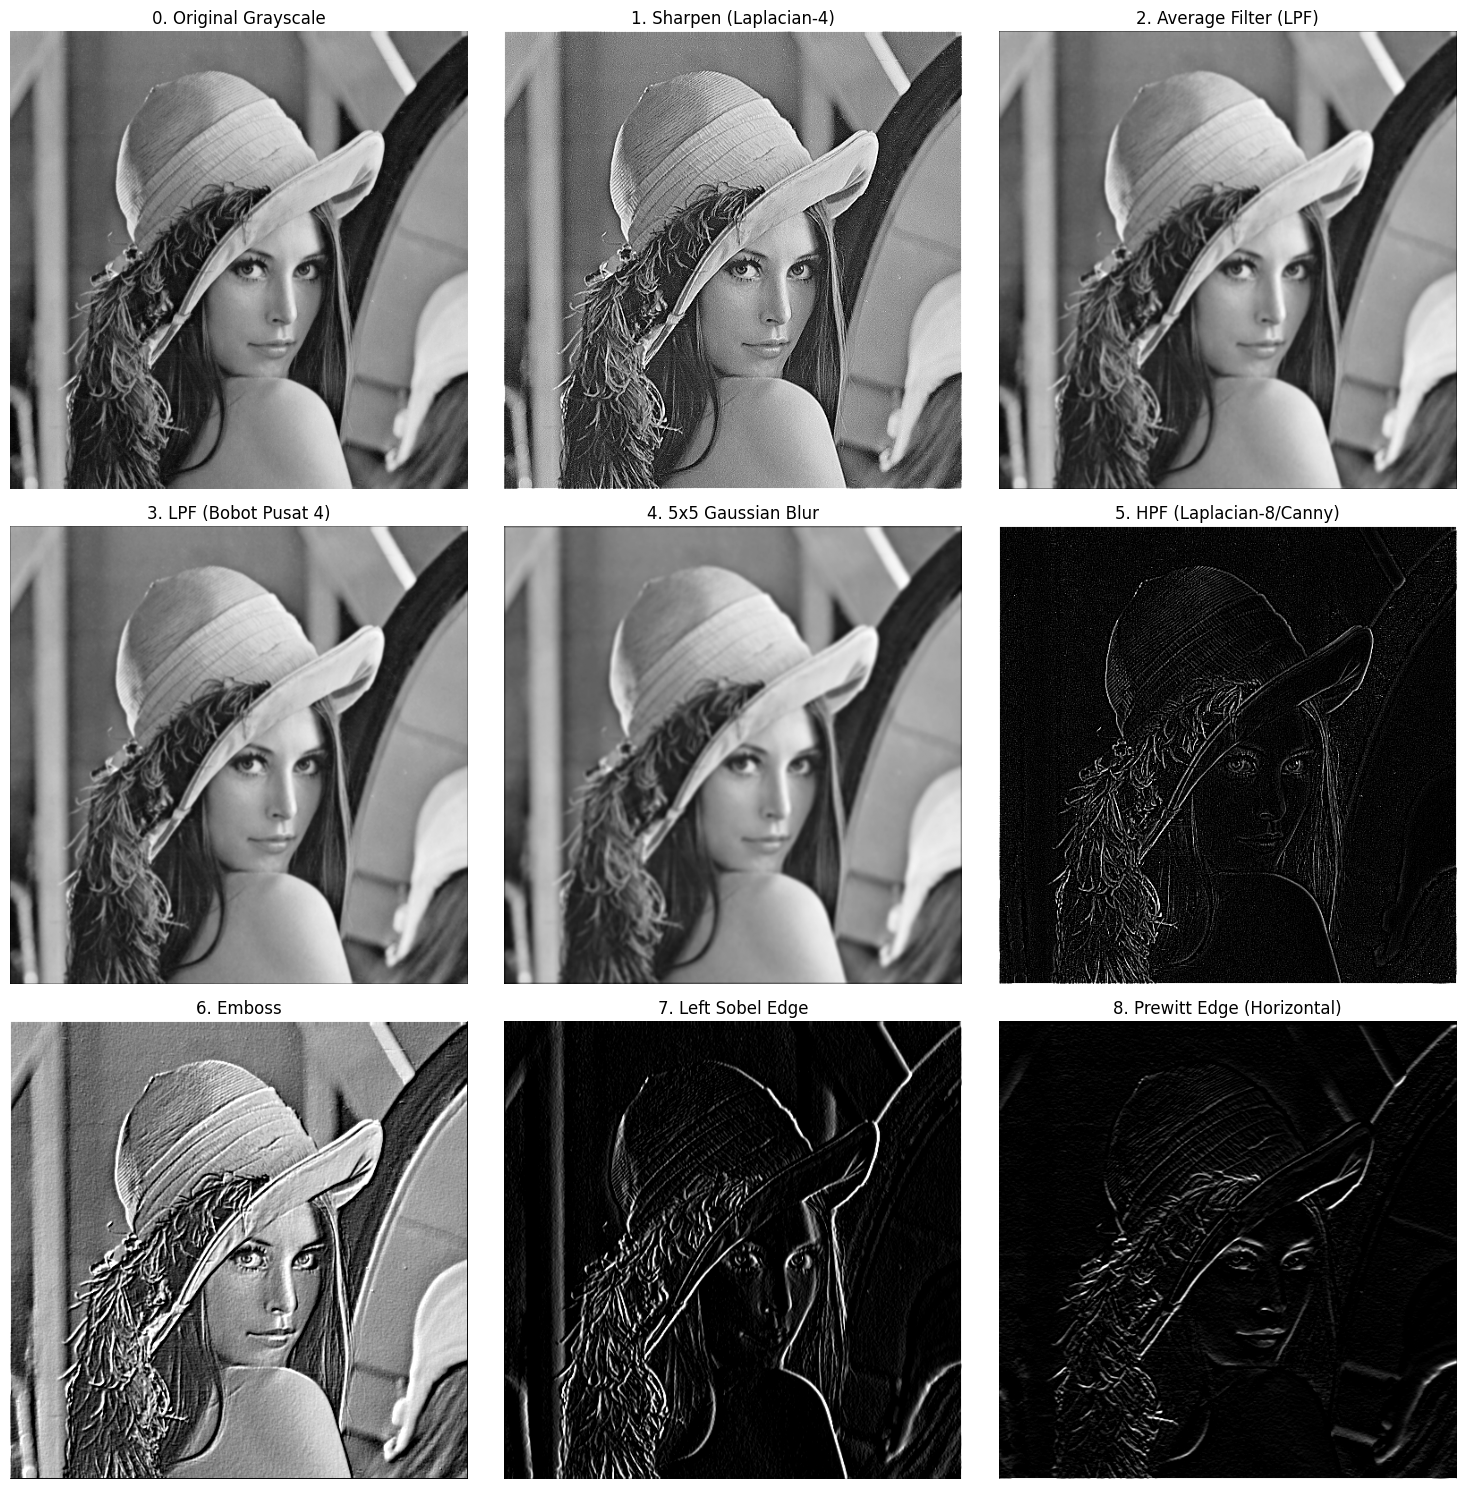

In [ ]:
print("\n" + "="*70)
print("HASIL KONVOLUSI MANUAL UNTUK BERBAGAI FILTER SPASIAL (Soal 2f & 3)")
print("="*70)

# Terapkan semua filter
filters = {
    "0. Original Grayscale": img_array,
    "1. Sharpen (Laplacian-4)": konvolusi_manual(img_array, SHARPEN_KERNEL), # Soal 2f
    "2. Average Filter (LPF)": konvolusi_manual(img_array, AVERAGE_KERNEL),
    "3. LPF (Bobot Pusat 4)": konvolusi_manual(img_array, LPF_KERNEL),
    "4. 5x5 Gaussian Blur": konvolusi_manual(img_array, GAUSSIAN_5X5_KERNEL),
    "5. HPF (Laplacian-8/Canny)": konvolusi_manual(img_array, HPF_LAPLACIAN_KERNEL),
    "6. Emboss": konvolusi_manual(img_array, EMBOSS_KERNEL),
    "7. Left Sobel Edge": konvolusi_manual(img_array, LEFT_SOBEL_KERNEL),
    "8. Prewitt Edge (Horizontal)": konvolusi_manual(img_array, PREWITT_KERNEL_H),
}

# Tampilkan Hasil dalam grid 3x3
num_filters = len(filters)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (title, img) in enumerate(filters.items()):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title, fontsize=12)
    axes[i].axis('off')

# Hapus subplot yang tidak terisi (jika totalnya kurang dari 9)
for i in range(num_filters, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()